-빅데이터 솔루션, 모델 개발 경진대회 플랫폼
-구글이 인수, 텐서플로우 저변 확대 의도. 
-캐글 랭킹을 척도로 보기도 함. 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

train = pd.read_csv("./Data/Titanic/train.csv", sep = ",")
train.head()
test = pd.read_csv("./Data/Titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,survived,dead
female,233,81
male,109,468


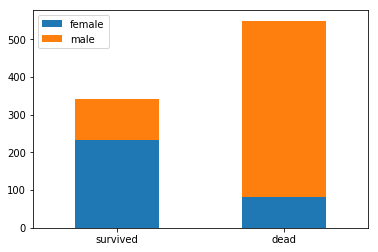

In [3]:
def show_chart(param):
    survived = train.loc[train["Survived"] == 1,param].value_counts() #해당 칼럼 각 값들에 대한 빈도
    survived.name = "survived"
    df1 = pd.DataFrame(survived)
    dead = train.loc[train["Survived"] == 0,param].value_counts() #해당 칼럼 각 값들에 대한 빈도
    dead.name = "dead"
    df2 = pd.DataFrame(dead)
    df = df1.join(df2)
    display(df)
    df = df.transpose()
    df.plot(kind = "bar", stacked = True)
    plt.xticks(rotation = 0)
    plt.show()
show_chart("Sex")

* 성별에 female, mail 0과 1로 바꾸기
* Age NaN처리 해야한다.  평균, 남녀 평균 등
* Age는 10대, 20, 30대 등 범주로 나누어서 빈도 이용 처리. 
* 연속적인 값을 카테고리로 전환시키는 것, = Binning
* Fare에 값 1개 빠져있어서 채워줘야한다. 
* Fare normalization처리
* Pclass처리 
* 사촌, 부모자식, 아이들

In [4]:
# data setting male = 0 female = 1

train.loc[train["Sex"] == "female","Sex"] = 1
train.loc[train["Sex"] == "male","Sex"] = 0

train.head()

# data setting male = 0 female = 1

test.loc[test["Sex"] == "female","Sex"] = 1
test.loc[test["Sex"] == "male","Sex"] = 0

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# # #Age Miss 채우기
Miss = train[train["Name"].str.contains(r"\bMiss\b")]
round(Miss["Age"].mean())  #< = 21.773972602739725

Miss = np.array(train["Name"].str.contains(r"\bMiss\b"),dtype = np.int32)
Age = np.array(train["Age"].isna(),dtype = np.int32)

# 튜플의 참 거짓 값을 정수형으로 바꾸면 1,0이 된다. 이때 중복되는 것을 찾기 위해 배열로 만들어서 더해서 값이 2가 되는 것을 찾으면 된다. 
train.loc[(Miss + Age == 2),"Age"] = train[train["Name"].str.contains(r"\bMiss\b")]["Age"].mean()

train

# # #Age Miss 채우기
Miss = test[test["Name"].str.contains(r"\bMiss\b")]
round(test["Age"].mean())  #< = 21.773972602739725

Miss = np.array(test["Name"].str.contains(r"\bMiss\b"),dtype = np.int32)
Age = np.array(test["Age"].isna(),dtype = np.int32)

# 튜플의 참 거짓 값을 정수형으로 바꾸면 1,0이 된다. 이때 중복되는 것을 찾기 위해 배열로 만들어서 더해서 값이 2가 되는 것을 찾으면 된다. 
test.loc[(Miss + Age == 2),"Age"] = test[test["Name"].str.contains(r"\bMiss\b")]["Age"].mean()

test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# # #Age Mrs 채우기
Miss = train[train["Name"].str.contains(r"\bMrs\b")]
round(Miss["Age"].mean())  #< = 21.773972602739725

Miss = np.array(train["Name"].str.contains(r"\bMrs\b"),dtype = np.int32)
Age = np.array(train["Age"].isna(),dtype = np.int32)

# 튜플의 참 거짓 값을 정수형으로 바꾸면 1,0이 된다. 이때 중복되는 것을 찾기 위해 배열로 만들어서 더해서 값이 2가 되는 것을 찾으면 된다. 
train.loc[(Miss + Age == 2),"Age"] = train[train["Name"].str.contains(r"\bMrs\b")]["Age"].mean()

train

# # #Age Mrs 채우기
Miss = test[test["Name"].str.contains(r"\bMrs\b")]
round(Miss["Age"].mean())  #< = 21.773972602739725

Miss = np.array(test["Name"].str.contains(r"\bMrs\b"),dtype = np.int32)
Age = np.array(test["Age"].isna(),dtype = np.int32)

# 튜플의 참 거짓 값을 정수형으로 바꾸면 1,0이 된다. 이때 중복되는 것을 찾기 위해 배열로 만들어서 더해서 값이 2가 되는 것을 찾으면 된다. 
test.loc[(Miss + Age == 2),"Age"] = test[test["Name"].str.contains(r"\bMrs\b")]["Age"].mean()

test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,S


In [7]:
# # #Age Mr 채우기
Miss = train[train["Name"].str.contains(r"\bMr\b")]
round(Miss["Age"].mean())  #< = 21.773972602739725

Miss = np.array(train["Name"].str.contains(r"\bMr\b"),dtype = np.int32)
Age = np.array(train["Age"].isna(),dtype = np.int32)

# 튜플의 참 거짓 값을 정수형으로 바꾸면 1,0이 된다. 이때 중복되는 것을 찾기 위해 배열로 만들어서 더해서 값이 2가 되는 것을 찾으면 된다. 
train.loc[(Miss + Age == 2),"Age"] = train[train["Name"].str.contains(r"\bMr\b")]["Age"].mean()

train

# # #Age Mr 채우기
Miss = test[test["Name"].str.contains(r"\bMr\b")]
round(Miss["Age"].mean())  #< = 21.773972602739725

Miss = np.array(test["Name"].str.contains(r"\bMr\b"),dtype = np.int32)
Age = np.array(test["Age"].isna(),dtype = np.int32)

# 튜플의 참 거짓 값을 정수형으로 바꾸면 1,0이 된다. 이때 중복되는 것을 찾기 위해 배열로 만들어서 더해서 값이 2가 되는 것을 찾으면 된다. 
test.loc[(Miss + Age == 2),"Age"] = test[test["Name"].str.contains(r"\bMr\b")]["Age"].mean()

test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,S


In [8]:
#Age Binning
bins = [0.0,15.0,30.0,45.0,60.0,80.0]
bins_names = ["0~","15~","30~","45~","60~"]
AG = pd.cut(train["Age"], bins, labels = bins_names)

AG_dummies = pd.get_dummies(AG, prefix = "AG")
AG_dummies
train =  train.join(AG_dummies)
train

#Age Binning
# bins = [0.0,15.0,30.0,45.0,60.0,80.0]
# bins_names = ["0~","15~","30~","45~","60~"]
# AG = pd.cut(train["Age"], bins, labels = bins_names)

# AG_dummies = pd.get_dummies(AG, prefix = "AG")
# AG_dummies
test =  test.join(AG_dummies)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AG_0~,AG_15~,AG_30~,AG_45~,AG_60~
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,Q,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,S,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,Q,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,S,0,0,1,0,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,S,0,0,1,0,0
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,Q,0,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,S,1,0,0,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,C,0,1,0,0,0
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,S,1,0,0,0,0


In [9]:
PC_dummies = pd.get_dummies(train["Pclass"], prefix = "Pclass")
PC_dummies
train =  train.join(PC_dummies)
train

# PC_dummies = pd.get_dummies(train["Pclass"], prefix = "Pclass")
# PC_dummies
test =  test.join(PC_dummies)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AG_0~,AG_15~,AG_30~,AG_45~,AG_60~,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,Q,0,1,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,Q,0,1,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S,0,0,1,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,S,0,0,1,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,Q,0,0,0,1,0,1,0,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,S,1,0,0,0,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,C,0,1,0,0,0,0,0,1
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,S,1,0,0,0,0,0,1,0


In [10]:
train["Passenger"] = train["SibSp"] + train["Parch"]


train.loc[train["Passenger"] > 0,"Passenger"] = 1 
train

test["Passenger"] = test["SibSp"] + test["Parch"]


test.loc[test["Passenger"] > 0,"Passenger"] = 1 
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AG_0~,AG_15~,AG_30~,AG_45~,AG_60~,Pclass_1,Pclass_2,Pclass_3,Passenger
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,Q,0,1,0,0,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,Q,0,1,0,0,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S,0,0,1,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,0,0,1,1
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,S,0,0,1,0,0,0,0,1,0
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,Q,0,0,0,1,0,1,0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,S,1,0,0,0,0,0,0,1,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,C,0,1,0,0,0,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,S,1,0,0,0,0,0,1,0,1


In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AG_0~', 'AG_15~',
       'AG_30~', 'AG_45~', 'AG_60~', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Passenger'],
      dtype='object')

In [12]:
data_x = train.drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)

data_y = train.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AG_0~', 'AG_15~',
       'AG_30~', 'AG_45~', 'AG_60~', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Passenger'], axis = 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler

#2. Training data set
x_data  = MinMaxScaler().fit_transform(data_x.values)

y_data = data_y.values.reshape(-1,1)

#3. PlaceHolder
x_data.shape
X = tf.placeholder(shape = [None,10], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

#4. Weight & bias
W = tf.Variable(tf.random_normal([10,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

#5. Hypothesis
logit = tf.matmul(X,W)+b
H = tf.sigmoid(logit)

#6. Cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = Y))

#7. Train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)


#8.session , 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#9. 학습
for step in range(10000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 1000 == 0:
        print("Cost:{}".format(cost_val))
        
#10. accuracy 측정
predict = tf.cast(H>0.5, dtype = tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

# print("정확도 :{}".format(sess.run(accuracy, feed_dict = {X:T_data_x, Y:data_y})))

D:\Anaconda3\envs\data_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Cost:0.6441484093666077
Cost:0.5095144510269165
Cost:0.4769167900085449
Cost:0.46415284276008606
Cost:0.4580846428871155
Cost:0.45490625500679016
Cost:0.45313945412635803
Cost:0.45211082696914673
Cost:0.45148834586143494
Cost:0.4510953724384308


In [14]:
test = test.drop(['Pclass', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)


In [17]:
test.columns


Index(['PassengerId', 'Sex', 'AG_0~', 'AG_15~', 'AG_30~', 'AG_45~', 'AG_60~',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Passenger'],
      dtype='object')

In [19]:

enter = []

for p in test["PassengerId"]:
    result = sess.run(predict, feed_dict={X:test.loc[test["PassengerId"]==p,"Sex":]})
    if result [0] == 0:
        enter.append([p,0])
    elif result [0] ==1:
        enter.append([p,1])
    else:
        print(p,"Nan")
    
submission = pd.DataFrame(enter,columns = ["Passengerid","Survived"])
submission

,Passengerid,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [22]:
submission.to_csv("./Data/Titanic/submission.csv",header = True, index = False)